In [ ]:
import pandas as pd
import yfinance as yf

# Define the ticker symbol for the stock of interest
ticker = 'AAPL'

# Fetch historical stock prices using Yahoo Finance API
data = yf.download(ticker, start='2022-01-01', end='2023-01-01')['Adj Close']

# Print the first few rows of the data
print(data.head())

[*********************100%***********************]  1 of 1 completed

Ticker                           AAPL
Date                                 
2022-01-03 00:00:00+00:00  179.076614
2022-01-04 00:00:00+00:00  176.803802
2022-01-05 00:00:00+00:00  172.100830
2022-01-06 00:00:00+00:00  169.227936
2022-01-07 00:00:00+00:00  169.395203


In [ ]:
import pandas as pd

# Example strategy: Moving Average Crossover
def moving_average_crossover_strategy(data, short_window=50, long_window=200):
    signals = pd.DataFrame(index=data.index)
    signals['Signal'] = 0.0

    # Calculate short-term and long-term moving averages
    signals['Short_MA'] = data.rolling(window=short_window).mean()
    signals['Long_MA'] = data.rolling(window=long_window).mean()

    # Generate trading signals
    signals.loc[signals['Short_MA'] > signals['Long_MA'], 'Signal'] = 1.0
    signals.loc[signals['Short_MA'] < signals['Long_MA'], 'Signal'] = -1.0

    return signals

# Use the moving average crossover strategy on our data
signals = moving_average_crossover_strategy(data)
print(signals.tail())

                           Signal    Short_MA     Long_MA
Date                                                     
2022-12-23 00:00:00+00:00    -1.0  142.559827  150.188244
2022-12-27 00:00:00+00:00    -1.0  142.399101  150.069477
2022-12-28 00:00:00+00:00    -1.0  142.079776  149.951212
2022-12-29 00:00:00+00:00    -1.0  141.804630  149.828594
2022-12-30 00:00:00+00:00    -1.0  141.533645  149.685393


In [ ]:
import pandas as pd

# Example optimization: Adjusting moving average window lengths
short_window = 25
long_window = 160

# Use the moving average crossover strategy with adjusted parameters
signals = moving_average_crossover_strategy(data, short_window, long_window)
print(signals.tail())

                           Signal    Short_MA     Long_MA
Date                                                     
2022-12-23 00:00:00+00:00    -1.0  140.992536  146.858709
2022-12-27 00:00:00+00:00    -1.0  140.150986  146.725314
2022-12-28 00:00:00+00:00    -1.0  139.281330  146.552134
2022-12-29 00:00:00+00:00    -1.0  138.467093  146.450426
2022-12-30 00:00:00+00:00    -1.0  137.630292  146.374991


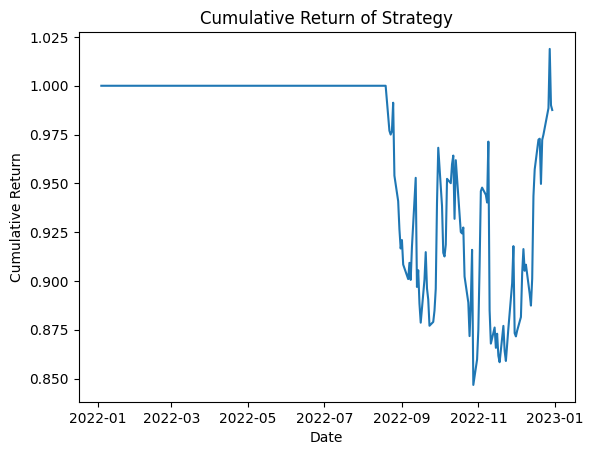

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example implementation and evaluation
def implement_strategy(data, signals):
    portfolio = pd.DataFrame(index=data.index)
    portfolio['Signal'] = signals['Signal']
    portfolio['Asset_Return'] = data.pct_change()
    portfolio['Strategy_Return'] = portfolio['Signal'] * portfolio['Asset_Return']
    portfolio['Cumulative_Return'] = (1 + portfolio['Strategy_Return']).cumprod()

    # Plot cumulative returns
    plt.plot(portfolio['Cumulative_Return'])
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.title('Cumulative Return of Strategy')
    plt.show()

# Implement and evaluate our strategy using the collected data and signals
implement_strategy(data, signals)

KeyError: "None of [DatetimeIndex(['2022-08-22 00:00:00+00:00', '2022-08-23 00:00:00+00:00',\n               '2022-08-24 00:00:00+00:00', '2022-08-25 00:00:00+00:00',\n               '2022-08-26 00:00:00+00:00', '2022-08-29 00:00:00+00:00',\n               '2022-08-30 00:00:00+00:00', '2022-08-31 00:00:00+00:00',\n               '2022-09-01 00:00:00+00:00', '2022-09-02 00:00:00+00:00',\n               '2022-09-06 00:00:00+00:00', '2022-09-07 00:00:00+00:00',\n               '2022-09-08 00:00:00+00:00', '2022-09-09 00:00:00+00:00',\n               '2022-09-12 00:00:00+00:00', '2022-09-13 00:00:00+00:00',\n               '2022-09-14 00:00:00+00:00', '2022-09-15 00:00:00+00:00',\n               '2022-09-16 00:00:00+00:00', '2022-09-19 00:00:00+00:00',\n               '2022-09-20 00:00:00+00:00', '2022-09-21 00:00:00+00:00',\n               '2022-09-22 00:00:00+00:00', '2022-09-23 00:00:00+00:00',\n               '2022-09-26 00:00:00+00:00', '2022-09-27 00:00:00+00:00'],\n              dtype='datetime64[ns, UTC]', name='Date', freq=None)] are in the [columns]"

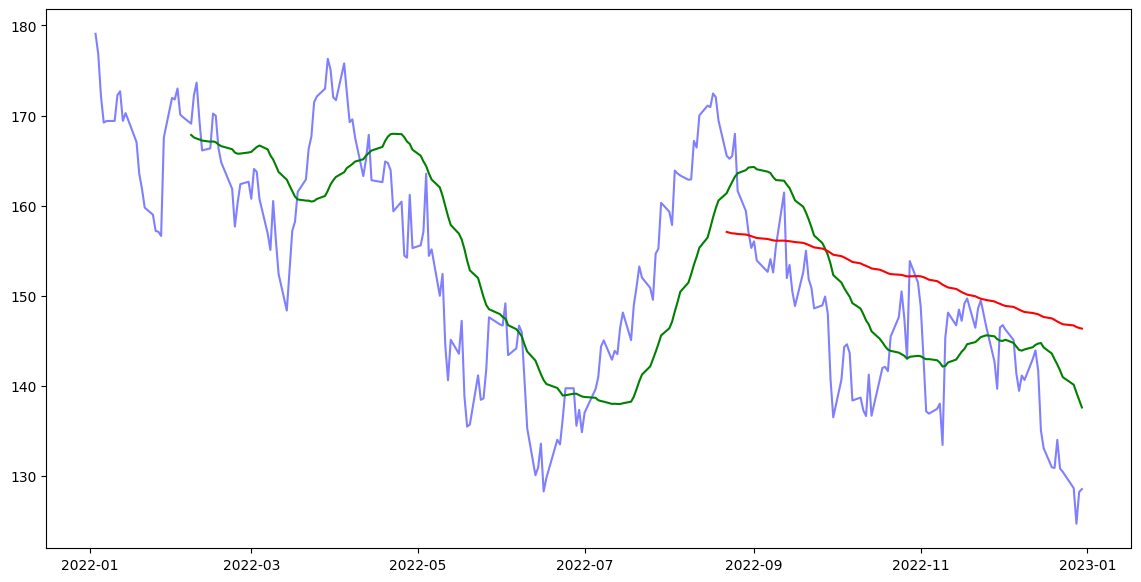

In [ ]:
import matplotlib.pyplot as plt

# Create a figure
plt.figure(figsize=(14, 7))

# Plot price data
plt.plot(data, label='Price', color='blue', alpha=0.5)

# Plot SMA and LMA for reference
plt.plot(signals['Short_MA'], label='Short-term Moving Average (SMA)', color='green')
plt.plot(signals['Long_MA'], label='Long-term Moving Average (LMA)', color='red')

# Mark buy signals (when Signal = 1)
buy_signals = signals[signals['Signal'] == 1.0]
plt.scatter(buy_signals.index, data[buy_signals.index], label='Buy Signal', marker='^', color='green', alpha=1)

# Mark sell signals (when Signal = 0)
sell_signals = signals[signals['Signal'] == 0.0]
plt.scatter(sell_signals.index, data[sell_signals.index], label='Sell Signal', marker='v', color='red', alpha=1)

# Add labels and legend
plt.title('Price Chart with Buy and Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()